<a href="https://colab.research.google.com/github/Naitik1611/Loan_prediction/blob/main/loanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ds=pd.read_csv('dataset.csv')
df=pd.DataFrame(ds)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df.drop('Loan_ID',axis=1,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
#remove missing values
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']

for col in null_cols:
    df[col] = df[col].fillna(
    df[col].dropna().mode().values[0] )   

df.isnull().sum().sort_values(ascending=False)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [5]:
#convert categorical data to numeric
to_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'3+': 3,'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0
}
df = df.applymap(lambda label: to_numeric.get(label) if label in to_numeric else label)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB
None


In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [8]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(y_pred)
cm=confusion_matrix(y_test,y_pred)
cr=(classification_report(y_test, y_pred))
acc1 = accuracy_score(y_pred,y_test)
print('Confusion matrix:')
print(cm)
print('Classification_report:')
print(cr)
print('Accuracy_score',acc1)

[1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 0]
Confusion matrix:
[[26 17]
 [19 92]]
Classification_report:
              precision    recall  f1-score   support

           0       0.58      0.60      0.59        43
           1       0.84      0.83      0.84       111

    accuracy                           0.77       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.77      0.77      0.77       154

Accuracy_score 0.7662337662337663


In [9]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cr=(classification_report(y_test, y_pred))
acc2 = accuracy_score(y_pred,y_test)
print('Confusion matrix:')
print(cm)
print('Classification_report:')
print(cr)
print('Accuracy_score',acc2)

Confusion matrix:
[[ 19  24]
 [  8 103]]
Classification_report:
              precision    recall  f1-score   support

           0       0.70      0.44      0.54        43
           1       0.81      0.93      0.87       111

    accuracy                           0.79       154
   macro avg       0.76      0.68      0.70       154
weighted avg       0.78      0.79      0.78       154

Accuracy_score 0.7922077922077922


In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cr=(classification_report(y_test, y_pred))
acc3 = accuracy_score(y_pred,y_test)
print('Confusion matrix:')
print(cm)
print('Classification_report:')
print(cr)
print('Accuracy_score',acc3)

Confusion matrix:
[[  1  42]
 [  0 111]]
Classification_report:
              precision    recall  f1-score   support

           0       1.00      0.02      0.05        43
           1       0.73      1.00      0.84       111

    accuracy                           0.73       154
   macro avg       0.86      0.51      0.44       154
weighted avg       0.80      0.73      0.62       154

Accuracy_score 0.7272727272727273


In [11]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cr=(classification_report(y_test, y_pred))
acc4 = accuracy_score(y_pred,y_test)
print('Confusion matrix:')
print(cm)
print('Classification_report:')
print(cr)
print('Accuracy_score',acc4)

Confusion matrix:
[[ 20  23]
 [  2 109]]
Classification_report:
              precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154

Accuracy_score 0.8376623376623377


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [12]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cr=(classification_report(y_test, y_pred))
acc5 = accuracy_score(y_pred,y_test)
print('Confusion matrix:')
print(cm)
print('Classification_report:')
print(cr)
print('Accuracy_score',acc5)

Confusion matrix:
[[ 20  23]
 [  3 108]]
Classification_report:
              precision    recall  f1-score   support

           0       0.87      0.47      0.61        43
           1       0.82      0.97      0.89       111

    accuracy                           0.83       154
   macro avg       0.85      0.72      0.75       154
weighted avg       0.84      0.83      0.81       154

Accuracy_score 0.8311688311688312


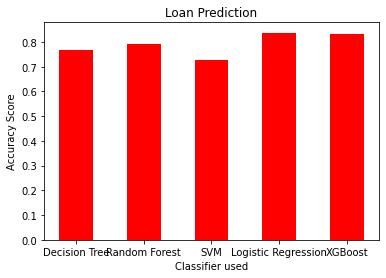

In [13]:
classifiers=['Decision Tree','Random Forest','SVM','Logistic Regression','XGBoost']
scores=[acc1,acc2,acc3,acc4,acc5]
plt.bar(classifiers, scores, color ='red', width = 0.5)
plt.xlabel("Classifier used")
plt.ylabel("Accuracy Score")
plt.title("Loan Prediction")
plt.show()

In [14]:
test=pd.read_csv('test.csv')
# print(test)
t_df=pd.DataFrame(test)
# print(t_df)
t_df.drop('Loan_ID',axis=1,inplace=True)
# print(t_df)
to_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}
t_df = t_df.applymap(lambda label: to_numeric.get(label) if label in to_numeric else label)
Dependents_ = pd.to_numeric(t_df.Dependents)
t_df.drop(['Dependents'], axis = 1, inplace = True)
t_df = pd.concat([t_df, Dependents_], axis = 1)
print(t_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    float64
 1   Married            367 non-null    int64  
 2   Education          367 non-null    int64  
 3   Self_Employed      344 non-null    float64
 4   ApplicantIncome    367 non-null    int64  
 5   CoapplicantIncome  367 non-null    int64  
 6   LoanAmount         362 non-null    float64
 7   Loan_Amount_Term   361 non-null    float64
 8   Credit_History     338 non-null    float64
 9   Property_Area      367 non-null    int64  
 10  Dependents         357 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 31.7 KB
None


In [15]:
t_df.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

In [16]:
null_cols = ['Credit_History', 'Self_Employed','Gender','Dependents', 'Loan_Amount_Term', 'LoanAmount']

for col in null_cols:
    t_df[col] = t_df[col].fillna(
    t_df[col].dropna().mode().values[0] )   

t_df.isnull().sum().sort_values(ascending=False)

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Dependents           0
dtype: int64

In [17]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X, y)
X_test = t_df.iloc[:,:].values
y_pred=classifier.predict(X_test)
print(y_pred)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
